<a href="https://colab.research.google.com/github/jungmin0710/DataAnalysisBasic/blob/main/bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

시계열 데이터 : 연속적인 시간에 따라 측정되는 데이터
분석 => 시계열 데이터 분석

1)규칙적 - 심장 박동
2)불규칙적 - 비트 코인


In [1]:
#step1)데이터 탐색
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
bitcoin_df = pd.read_csv('market-price.csv', names = ['day','price'])

In [5]:
print(bitcoin_df.shape)

(365, 2)


In [8]:
print(bitcoin_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


In [10]:
bitcoin_df.tail()

,day,price
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231
364,2018-08-26 00:00:00,6673.274167


In [11]:
#글자로 인식되는 day피처를 시계열 피처로 변환
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

In [12]:
print(bitcoin_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     365 non-null    datetime64[ns]
 1   price   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB
None


In [14]:
# day피처 값을 인덱스로 설정
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=Trueㅑ)

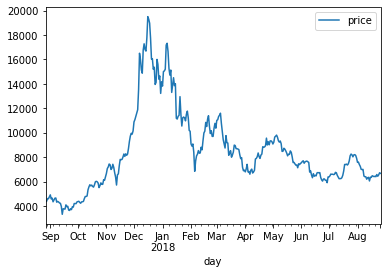

In [15]:
# 시각화

bitcoin_df.plot()
plt.show()

In [16]:
#step2)데이터 예측

ARIMA 분석 방법(AR + I + MA)

AR : 자기 자신의 과거 정보로 예측, 현재 상태는 이전의 상태를 참고해서 계산 될 수 있다.

MA : 이전의 오차 정보로 예측



In [18]:
#ARIMA 분석

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
model = ARIMA(bitcoin_df.price.values, order = (2,1,2))
#2 AR, 1 차분, 2 MA

model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2780.074
Method:                       css-mle   S.D. of innovations            501.536
Date:                Wed, 07 Oct 2020   AIC                           5572.148
Time:                        03:04:59   BIC                           5595.531
Sample:                             1   HQIC                          5581.442
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3906     26.944      0.237      0.813     -46.419      59.200
ar.L1.D.y      0.4496      0.029     15.512      0.000       0.393       0.506
ar.L2.D.y     -0.9622      0.023    -42.314      0.0

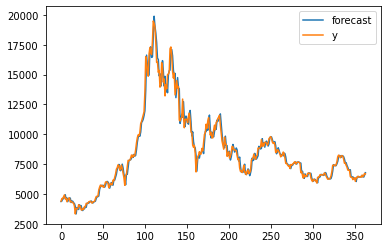

In [20]:
fig = model_fit.plot_predict()

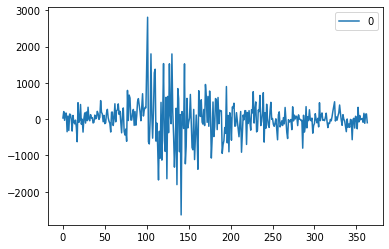

In [23]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
#실제 값과 예측값 사이의 오차 변동을 나타낸 그림
#폭이 일정하면 좋은 예측 모델임

In [26]:
# 예측값을 실제 데이터와 비교

bitcoin_test_df = pd.read_csv('market-price-test.csv', names = ['day','price'])

forecast_data = model_fit.forecast(steps=5)
#학습 데이터 셋으로부터 5일 후를 예측


In [31]:
pred_price = forecast_data[0].tolist()
#마지막 5일의 예측 데이터

test_price = bitcoin_test_df.price.values
#실제 데이터값

pred_price_lower = []
#마지막 5일의 예측 데이터의 최솟값
pred_price_upper = []
#마지막 5일의 예측 데이터의 최댓값

for lower_upper in forecast_data[2]:
  lower = lower_upper[0]
  upper = lower_upper[1]
  pred_price_lower.append(lower)
  pred_price_upper.append(upper)


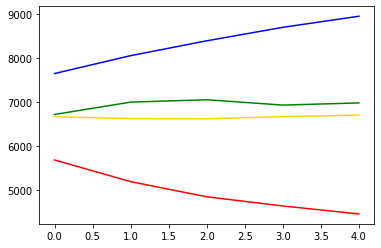

In [34]:
plt.plot(pred_price, color = 'gold')
plt.plot(pred_price_lower, color = 'red')
plt.plot(pred_price_upper, color = 'blue')
plt.plot(test_price, color = 'green')
plt.show()


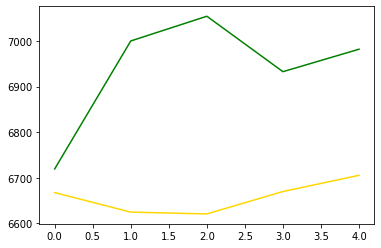

In [35]:
plt.plot(pred_price, color = 'gold')
plt.plot(test_price, color = 'green')
plt.show()

Facebook Prophet
:페이스북 데이처 예측분석 도구

Additive 모델이라는 모델링 방법에 기반한 시계열 예측 모델

시계열 데이터의 트렌드성(연간/월간/일간)을 예측

In [36]:
pip install fbprophet

In [37]:
from fbprophet import Prophet


In [39]:
#피처명 변경
#prophet에 input data를 집어넣을 때 columns는 'ds'와 'y'로 고정

bitcoin_df = pd.read_csv('market-price.csv', names = ['ds','y'])
bitcoin_test_df = pd.read_csv('market-price-test.csv', names = ['ds','y'])

In [40]:
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality = True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

In [42]:
# 5일 앞을 내다보며 예측

future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

forecast_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
365,2018-08-27,595.073916,6221.611719,7538.919852,595.073916,595.073916,10.907431,10.907431,10.907431,10.544862,10.544862,10.544862,-0.007796,-0.007796,-0.007796,-0.354773,-0.354773,-0.354773,0.0,0.0,0.0,6870.046369
366,2018-08-28,598.125014,6217.881541,7677.264564,598.125014,598.125014,10.907431,10.907431,10.907431,10.633309,10.633309,10.633309,0.026363,0.026363,0.026363,-0.300485,-0.300485,-0.300485,0.0,0.0,0.0,6958.173352
367,2018-08-29,601.176113,6277.974688,7703.355747,601.176113,601.176113,10.907431,10.907431,10.907431,10.588920,10.588920,10.588920,-0.055193,-0.055193,-0.055193,-0.263318,-0.263318,-0.263318,0.0,0.0,0.0,6966.981989
368,2018-08-30,604.227211,6261.450322,7761.691011,596.413538,606.527086,10.907431,10.907431,10.907431,10.631542,10.631542,10.631542,-0.029402,-0.029402,-0.029402,-0.246487,-0.246487,-0.246487,0.0,0.0,0.0,7028.094432
369,2018-08-31,607.278310,6323.344169,7907.703049,587.640152,613.888012,10.907431,10.907431,10.907431,10.694373,10.694373,10.694373,0.039476,0.039476,0.039476,-0.252535,-0.252535,-0.252535,0.0,0.0,0.0,7101.738804


In [43]:
#시각화
#그래프에 필요한 데이터만 뽑아오기
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
365,2018-08-27,6870.046369,6221.611719,7538.919852
366,2018-08-28,6958.173352,6217.881541,7677.264564
367,2018-08-29,6966.981989,6277.974688,7703.355747
368,2018-08-30,7028.094432,6261.450322,7761.691011
369,2018-08-31,7101.738804,6323.344169,7907.703049


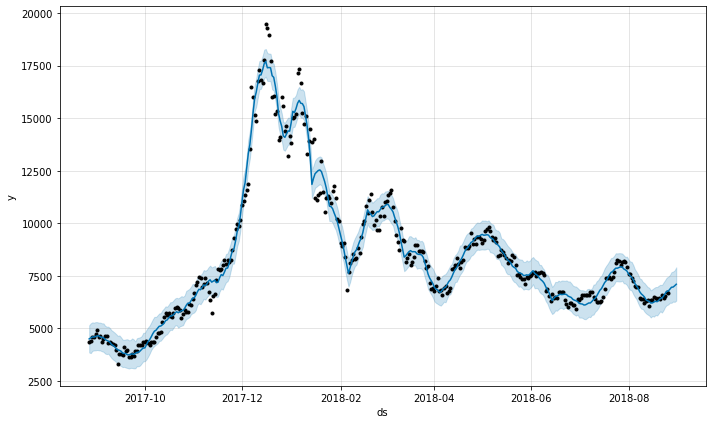

In [45]:
fig1 = prophet.plot(forecast_data)
#파란 실선 : 예측값
#검은 점: 실제값
#파란 범위 : 최댓값과 최솟값
#(인 것 같음)

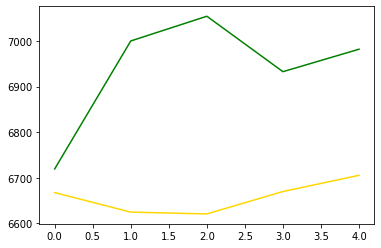

In [49]:
plt.plot(pred_price, color = "gold")
plt.plot(test_price, color = "green")
plt.show()
#예상